# Seminar 16
# Least Squares Problem

## Problem statement

1. **Wide:** assume given $m$ pairs of measurements $(x_i, y_i)$, where $ x_i \in \mathbb{R}^n, \; y_i \in \mathbb{R}^p$. Find such function $f$, that

$$
\frac{1}{2}\|f(x_i) - y_i \|^2_2 \to \min
$$

2. **Specific:** assume given $m$ pairs of measurements $(x_i, y_i)$, where $ x_i \in \mathbb{R}^n, \; y_i \in \mathbb{R}^p$. Find such *parametric* function $f(x, w)$, that

$$
\frac{1}{2}\|f(x_i, w) - y_i \|^2_2 \to \min_w
$$

3. **More specific:** assume given $m$ pairs of measurements $(x_i, y_i)$, where $ x_i \in \mathbb{R}^n, \; y_i \in \mathbb{R}$. Find such *parametric* function $f(x, w)$, that 
$$
\frac{1}{2} \sum_{i=1}^m(f(x_i, w) - y_i )^2 \to \min_w
$$

## Linear least squares problem

Consider case of linear dependence between measurements $x_i \in \mathbb{R}^n$ and $y_i \in \mathbb{R}, \; i = 1,\ldots, m$.

Then

$$
f(x, w) = x^{\top}w
$$

or

$$
f(X, W) = XW
$$

Linear least squares problem is stated in the following form

$$
L(w|X, y) = \frac{1}{2}\sum\limits_{i=1}^m (x^{\top}_i w - y_i)^2 = \frac{1}{2}\|Xw - y \|^2_2 \to \min_w
$$

**Remark.** Further we assume $m \geq n$ и $\mathrm{rank}(X) = n$ except special cases

### Normal equation

From the first order necessary optimality condition and convexity of the norm follows

$$
L'(w^* | X, y) = 0 \Rightarrow (X^{\top}X)w^* = X^{\top}y
$$
or

$$
w^* = (X^{\top}X)^{-1}X^{\top}y = X^+y = X^{\dagger}y,
$$

where $X^{\dagger} = X^+ = (X^{\top}X)^{-1}X^{\top}$ - *pseudo-inverse matrix*.

**Remark:** check yourself that you can derive expession for $w^*$!

**Q:** to what problem was reduced optimization problem?

### Direct methods

#### Cholesky decomposition

**Definition.** Any matrix $A \in \mathbb{S}^n_{++}$ has unique Cholesky decomposition:

$$
A = LL^{\top},
$$

where $L$ is lower-triangular matrix

The method:
1. Compute $X^{\top}X$ and $X^{\top}y$
2. Compute Cholesky decomposition of the matrix $X^{\top}X$
3. Find $w^*$ with forward and backward substitution

### Pro & contra

Pro 

- if $m \gg n$, then storage of $X^{\top}X$ requires much less memory than storage of $X$
- if the matrix $X$ is sparse, then there exist methods that give sparse Cholecky factor $L$

Contra

- condition number of $X^{\top}X$ is squared condition number of matrix $X$. Error is proportional to condition number.
- it is required to compute $X^{\top}X$

#### QR decomposition

**Definition.** Any matrix $A \in \mathbb{R}^{m \times n}$ can be decomposed in the form

$$
A = QR,
$$

where $Q \in \mathbb{R}^{m \times m}$ is unitary matrix, and $R \in \mathbb{R}^{m \times n}$ is rectangular upper triangular.

#### Application

1. Compute QR decomposition of matrix $X$: $X = QR$.
2. $Q = [Q_1, Q_2]$, $Q_1 \in \mathbb{R}^{m \times n}$,
$R = 
\begin{bmatrix}
R_1\\
0
\end{bmatrix}$,
$R_1 \in \mathbb{R}^{n \times n}$ is square upper triangular matrix
2. The problem has the form

$$
\|R_1w - Q_1^{\top}y \|^2_2 \to \min_w
$$

and normal equation

$$
R_1w^* = Q_1^{\top}y
$$

- We obtain linear system with square upper triangular matrix
- It can be easily solved with backward substitution

### Pro & contra

Pro 

- error is proportional to condition number of $X$, not $X^{\top}X$
- more stable than Cholesky decomposition based method

Contra

- no way to control stability of solution

#### Singular value decomposition (SVD)

**Definition.** Any matrix $A \in \mathbb{R}^{m \times n}$ can be represented in the form

$$
A = U\widehat{\Sigma} V^* = [U_1, U_2] \begin{bmatrix} \Sigma\\ 0 \end{bmatrix} V^*,
$$

where $U \in \mathbb{R}^{m \times m}$ is unitary, $U_1 \in \mathbb{R}^{m \times n}$, $\Sigma = \mathrm{diag}(\sigma_1, \ldots, \sigma_n) \in \mathbb{R}^{n \times n}$ is diagonal with singular values $\sigma_i$ in the diagonal, and $V \in \mathbb{R}^{n \times n}$ is unitary.

#### Application

$$
\| Xw - y\|^2_2 = \left\| \begin{bmatrix} \Sigma \\ 0 \end{bmatrix} V^* w - \begin{bmatrix} U_1^{\top} \\ U_2^{\top} \end{bmatrix}y \right\|^2_2 \sim \| \Sigma V^* w - U_1^{\top}y \|^2_2
$$

Solving linear system with **square** matrix:

$$
w^* = V\Sigma^{-1}U_1^{\top}y = \sum\limits_{i=1}^n \frac{u_i^{\top}y}{\sigma_i} v_i,
$$

where $v_i$ and $u_i$ are columns of matrices $V$ and $U_1$ respectively. 

### Pro & contra

Pro 

- information about sensitivity of solution to perturbation of $y$
- control of stability: small singular values can be excluded from computations
- if matrix $X$ is close to singular, then only SVD can help to diagnose this

Contra

- computing of SVD is more costly compared with QR and Cholesky decompositions

### Experiments

In [3]:
import numpy as np

n = 1000
m = 2 * n
X = np.random.randn(m, n)
w = np.random.randn(n)
y = X.dot(w) + 1e-5 * np.random.randn(m)

w_est = np.linalg.solve(X.T.dot(X), X.T.dot(y))
print(np.linalg.norm(w - w_est))

1.0647878362675427e-05


In [2]:
import scipy.linalg as sclin
import scipy.sparse.linalg as scsplin

def CholSolve(X, y):
    res = sclin.cho_factor(X.T.dot(X), lower=True)
    return sclin.cho_solve(res, X.T.dot(y))

def QRSolve(X, y):
    Q, R = sclin.qr(X)
    return sclin.solve_triangular(R[:R.shape[1], :], Q[:, :R.shape[1]].T.dot(y))

def SVDSolve(X, y):
    U, s, V = sclin.svd(X, full_matrices=False)    
    return V.T.dot(np.diagflat(1.0 / s).dot(U.T.dot(y)))

def CGSolve(X, y):
    def mv(x):
        return X.T.dot(X.dot(x))
    LA = scsplin.LinearOperator((X.shape[1], X.shape[1]), matvec=mv)
    w, _ = scsplin.cg(LA, X.T.dot(y), tol=1e-10)
    return w

def NPSolve(X, y):
    return np.linalg.solve(X.T.dot(X), X.T.dot(y))

def LSQRSolve(X, y):
    res = scsplin.lsqr(X, y)
    return res[0]

In [3]:
w_chol = CholSolve(X, y)
print(np.linalg.norm(w - w_chol))
w_qr = QRSolve(X, y)
print(np.linalg.norm(w - w_qr))
w_svd = SVDSolve(X, y)
print(np.linalg.norm(w - w_svd))
w_cg = CGSolve(X, y)
print(np.linalg.norm(w - w_cg))
w_np = NPSolve(X, y)
print(np.linalg.norm(w - w_np))
w_lsqr = LSQRSolve(X, y)
print(np.linalg.norm(w - w_lsqr))

9.87998623568672e-06
9.879986239053383e-06
9.879986237687417e-06
9.879512604510694e-06
9.879986234886743e-06
9.879986068607817e-06


In [4]:
%timeit w_chol = CholSolve(X, y)
%timeit w_qr = QRSolve(X, y)
%timeit w_svd = SVDSolve(X, y)
%timeit w_cg = CGSolve(X, y)
%timeit w_np = NPSolve(X, y)
%timeit w_lsqr = LSQRSolve(X, y)

36 ms ± 2.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
297 ms ± 27.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
454 ms ± 18.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
97.3 ms ± 6.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
43.1 ms ± 5.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
174 ms ± 36.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [2]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)

In [5]:
n = [10, 100, 1000, 2000, 5000]
chol_time = []
qr_time = []
svd_time = []
cg_time = []
np_time = []
lsqr_time = []
for dim in n:
    m = int(1.5 * dim)
    X = np.random.randn(m, dim)
    w = np.random.randn(dim)
    y = X.dot(w) + 1e-5 * np.random.randn(m)
    st = time.time()
    w_chol = CholSolve(X, y)
    chol_time.append(time.time() - st)
    st = time.time()
    w_qr = QRSolve(X, y)
    qr_time.append(time.time() - st)
    st = time.time()
    w_svd = SVDSolve(X, y)
    svd_time.append(time.time() - st)
    st = time.time()
    w_cg = CGSolve(X, y)
    cg_time.append(time.time() - st)
    st = time.time()
    w_np = NPSolve(X, y)
    np_time.append(time.time() - st)
    st = time.time()
    w_lsqr = LSQRSolve(X, y)
    lsqr_time.append(time.time() - st)

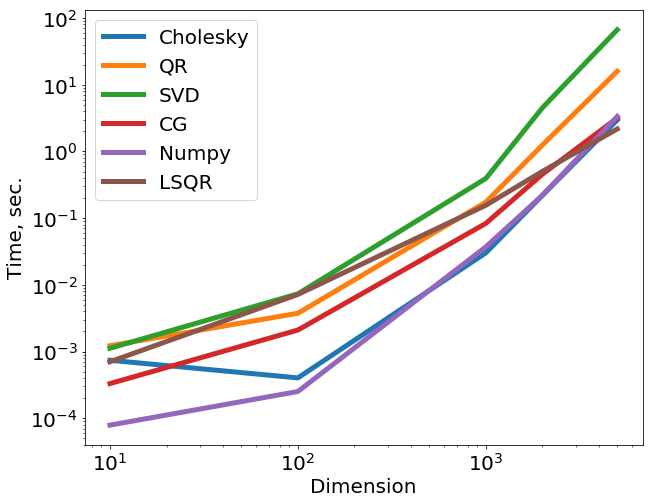

In [6]:
plt.figure(figsize=(10,8))
plt.plot(n, chol_time, linewidth=5, label="Cholesky")
plt.plot(n, qr_time, linewidth=5, label="QR")
plt.plot(n, svd_time, linewidth=5, label="SVD")
plt.plot(n, cg_time, linewidth=5, label="CG")
plt.plot(n, np_time, linewidth=5, label="Numpy")
plt.plot(n, lsqr_time, linewidth=5, label="LSQR")
plt.legend(loc="best", fontsize=20)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Dimension", fontsize=20)
plt.ylabel(r"Time, sec.", fontsize=20)
plt.xticks(fontsize = 20)
_ = plt.yticks(fontsize = 20)

## Non-linear least squares problem(J. Nocedal, S. Wright Numerical Optimization, Ch. 10)

**Q:** can we model required dependence between measurements with non-linear function $f(x, w)$?

**A:** Yes, we can!

**BUT!** There is no analytical solution, we have to use iterative method!

### Gauss-Newton method

$$
S = \frac{1}{2}\| f(X, w) - y\|^2_2 = \frac{1}{2}\|r(w)\|_2^2 \to \min_w
$$

$$
S' = \sum_{i=1}^m r_i(w)r_i'(w) = J^{\top}(w)r(w), 
$$

where $J$ is Jacobian of residuals $r(w)$.

\begin{equation*}
\begin{split}
S''(w) = & \sum_{i=1}^m r_i'(w)r_i'(w) + \sum_{i=1}^m r_i(w)r_i''(w) \\
= & J^{\top}(w)J(w) + \sum_{i=1}^m r_i(w)r_i''(w)
\end{split}
\end{equation*}

#### Newton method

$$
S''(w_k)h_{k+1} = -J^{\top}(w_k)r(w_k)
$$

$$
\left(J^{\top}(w_k)J(w_k) + \sum_{i=1}^m r_i(w_k)r_i''(w_k)\right) h_{k+1} = -J^{\top}(w_k)r(w_k)
$$

**Q:** what will change if we add name Gauss?

#### Gauss-Newton method

$$
\left(J^{\top}(w_k)J(w_k)\right) h_{k+1} = -J^{\top}(w_k)r(w_k)
$$

**Remark:** step size is selected with backtracking in particular with aformentioned rules.

#### Convergence theorem

**Theorem.** Assume residuals $r_i(w)$ are bounded, their gradients are Lipschitz and jacobian $J$ is full-rank. Then

$$
\lim_{k \to \infty} J^{\top}(w_k)r_k = 0,
$$

while step size is selected with curvature rule and sufficient decreasing rule.

#### Convergence speed

$$
\|w_{k+1} - w^* \|_2 \leq \| (J^{\top}J(w^*))^{-1}H(w^*)\| \|w_k - w^* \|_2 + O(\|w_k - w^* \|^2_2)
$$

- Convergence depends on ratio between $J^{\top}J$ and $H(w_k) = \sum\limits_{i=1}^m r_i(w_k)r_i''(w_k)$
- The smaller $\| (J^{\top}J(w^*))^{-1}H(w^*) \|$, the faster convergence
- If $H(w^*) = 0$, then convergence is locally quadratic

#### Large residual case

- The term $H(w_k)$ can not be ignored
- This case indicates that chosen parameteric function $f(X, w)$ is inadequate
- It requires *hybrid* methods, that work as Gauss-Newton method in the case of small residual and as Newton or Quasi-Newton method in the case of large residual

### Pro & contra

Pro

- $r''(w)$ is not required
- estimate of hessian is computed from the jacobian
- hessian approximation often is very accurate
- in the case of full-rank jacobian it is guaranteed that obtained direction is descent direction
- interpretation of the method as linearisation of function $f(x, w)$ in neighbourhood of minimizer

Contra

- hessian approximation can be very inaccurate
- if matrix $J^{\top}J$ is close to singular, solution is unstable, and even convergence is not guaranteed

###  Levenberg–Marquardt method 

#### What issues we already have?

- Newton method converges only **locally**, but **quadratic**
- Singularity of hessian or its approximation (like in Gauss-Newton method) lead to unstable solution
- Gradient descent converges to stationary point from **any** initial guess vector, but **linearly**

#### How to deal with these issues? At least partially...

**Idea:** separate spectrum of the hessian from zero with additional term $\lambda I$

Levenberg–Marquardt method :

$$
(f''(x_k) + \lambda_k I)h_k = -f'(x_k), \qquad \lambda_k > 0
$$

### Why is it a good idea?

- While $\lambda_k \to 0$ the method works as Newton method
- While $\lambda_k \to \infty$ the method works as gradient descent
- In Gauss-Newton method term $\lambda_k I$ is estimation of $H(w_k)$
- If estimation of hessian $J^{\top}J$ is sparse, then adding term $\lambda_k I$ does not significantly increase number of non zeros elements
- Regularization of the original problem - see below

### We still have one problem...

There are a lot of methods to select $\lambda_k$. General idea is similar to backtracking:

- set initial value $\lambda_0$
- if decreasing of objective is sufficent, then we are in the region where quadratic approximation is accurate enough and we can decrease $\lambda_{k+1}$
- if decreasing is insufficient, we have to increase $\lambda_k$, re-compute direction $h_k$ and check decreasing of the objective

#### Convergence

- Convergence proofs are not simple because the strategy of selecting $\lambda_k$ has to be taken into account
- Convergence to stationary point is guaranteed in the case of adequate modeling of the function curvature 

### Experiment

Consider the nonlinear least-squares problem for the following model

$$
f(w|x) = w_1 e^{w_2 x}\cos(w_3 x + w_4),
$$

where ground-truth parameter is $w = (1, -0.5, 10, 0)$

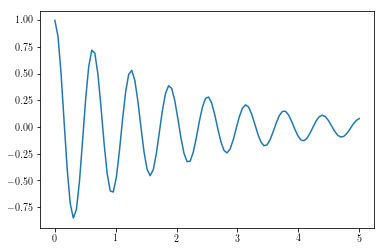

In [10]:
w = np.array([1, -0.5, 10, 0])
def f(x, w=w):
    return w[0] * np.exp(x * w[1]) * np.cos(w[2] * x + w[3])

num_points = 100
x_range = np.linspace(0, 5, num=num_points)
plt.plot(x_range, f(x_range))

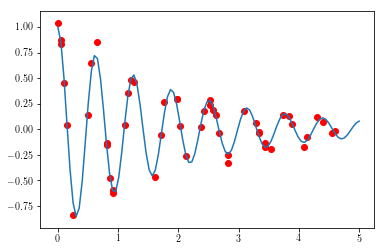

In [21]:
num_samples = num_points // 2
x_samples = np.random.choice(x_range, size=num_samples)
y_samples = f(x_samples) + 0.05 * np.random.randn(num_samples)
plt.plot(x_range, f(x_range))
plt.scatter(x_samples, y_samples, c="red")

In [24]:
import scipy.optimize as scopt

res = lambda w: f(x_samples, w) - y_samples
def jac(w):
    J = np.zeros((num_samples, 4))
    J[:, 0] = np.exp(x_samples * w[1]) * np.cos(x_samples * w[2] + w[3])
    J[:, 1] = w[0] * x_samples * np.exp(x_samples * w[1]) * np.cos(x_samples * w[2] + w[3])
    J[:, 2] = -w[0] * x_samples * np.exp(x_samples * w[1]) * np.sin(x_samples * w[2] + w[3])
    J[:, 3] = -w[0] * np.exp(x_samples * w[1]) * np.sin(x_samples * w[2] + w[3])
    return J

x0 = np.random.rand(4)
result = {}
result["LM"] = scopt.least_squares(fun=res, method="lm", x0=x0, jac=jac)
# result["TR"] = scopt.least_squares(fun=res, method="trf", x0=x0, jac=jac)
# result["Dogleg"] = scopt.least_squares(fun=res, method="dogbox", x0=x0, jac=jac)

Exact parameters = [ 1.  -0.5 10.   0. ]
LM method parameters = [ 1.04662213 -0.50006449 -9.9751842   6.25644984]


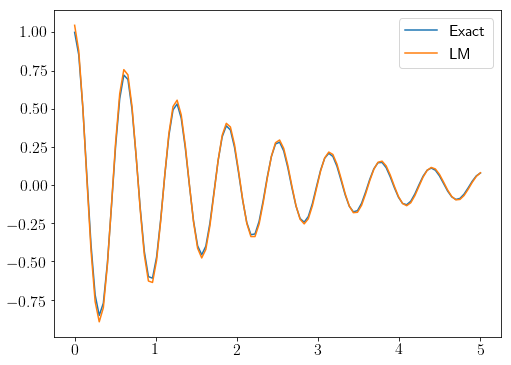

In [25]:
plt.figure(figsize=(8, 6))
fontsize = 16
plt.plot(x_range, f(x_range), label="Exact")
for method in result:
    plt.plot(x_range, f(x_range, result[method].x), label=method)
plt.legend(fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
print("Exact parameters = {}".format(w))
for method in result:
    print("{} method parameters = {}".format(method, result[method].x))

### Pro & Contra

Pro

- combination of advantages of previously studied methods
- automatic adaptation to gradient descent and Newton method
- improved version of Gauss-Newton method
- preserve sparsity of hessian estimate
- standard method de-facto for solving non-linear least squares problem [[1]](https://en.wikipedia.org/wiki/Levenberg–Marquardt_algorithm#Implementations)

Contra

- no universal choice of selection $\lambda$
- convergence speed is non-stable and depends on choice of $\lambda_k$

## Ill-posed problems

**Definition**. The problem is called *ill-posed*, if at least one of the following conditions of well-posedness problem is false:

1. Existence of the solution
2. Uniqueness of the solution
3. Continuous dependence on external parameters

### Regularization

**Definition.** Regularization is a process of introducing additional information in the model for solving ill-posed problem

Examples:
- improve stability with changing of the objective function
- add constraints which lead to uniqueness of the solution
- fix objective function so that the problem has finite solution

#### Tikhonov (Ridge or $\ell_2$) regularization

$$
\min_w \|Xw - y \|^2_2 + \frac{\alpha}{2}\|w\|^2_2, \quad \alpha > 0
$$

**Exercise:** derive analogue of normal equation for this problem. What interpretation has modified normal equation and why this regularization works?

The method to solve this problem is similar to linear case without regularization.

#### Lasso ($\ell_1$ regularization)

$$
\min_w \|Xw - y \|^2_2 + \alpha\|w\|_1, \quad \alpha > 0
$$

The method is coordinate descent

Features:
- non-differentiable, but convex objective function
- relaxation of $\ell_0$ constraint
- sparse solution

#### Elastic Net

$$
\min_w \|Xw - y \|^2_2 + \alpha \rho\|w\|_1 + \alpha\frac{1-\rho}{2}\| w \|^2_2, \quad \rho \in [0, 1], \alpha > 0
$$

Features:
- combination of Lasso and Ridge
- the method - coordinate descent
- more stable than Lasso

## Recap

1. Least squares problem
2. Methods for the linear case
3. Methods for non-linear case 
4. Ill-posed problems and methods to solve them